### Deskripsi Data

1. application_record.csv : 
- ID : Client number
- CODE_GENDER : Gender
- FLAG_OWN_CAR : Is there a car
- FLAG_OWN_REALTY : Is there a property
- CNT_CHILDREN : Number of children	
- AMT_INCOME_TOTAL : Annual income	
- NAME_INCOME_TYPE : Income category
- NAME_EDUCATION_TYPE : Education level
- NAME_FAMILY_STATUS : Marital status	
- NAME_HOUSING_TYPE : Way of living
- DAYS_BIRTH : Birthday , Count backwards from current day (0), -1 means yesterday
- DAYS_EMPLOYED: Start date of employment, Count backwards from current day(0). If positive, it means the person currently unemployed.
- FLAG_MOBIL: Is there a mobile phone
- FLAG_WORK_PHONE : Is there a work phone
- FLAG_PHONE: Is there a phone	
- FLAG_EMAIL : Is there an email	
- OCCUPATION_TYPE: Occupation
- CNT_FAM_MEMBERS : Family size

2. credit_record.csv :
- ID : Client number
- MONTHS_BALANCE: Record month, The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- STATUS: Status, 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

### Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


# memuat data application_record
df_app = pd.read_csv('/content/drive/MyDrive/code_with_gpt/application_record.csv')

# memuat data credit_record
df_credit = pd.read_csv('/content/drive/MyDrive/code_with_gpt/credit_record.csv')

# menggabungkan kedua dataset berdasarkan kolom 'ID'
df = pd.merge(df_app, df_credit, on='ID')

In [ ]:
# melihat data teratas
df.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-9,C


### What duplicate data are there?

In [ ]:
# mengecek duplikat pada data
duplicates = df.duplicated().sum()
print('Jumlah baris duplikat:', duplicates)

# menghapus duplikat pada data
df = df.drop_duplicates()

Jumlah baris duplikat: 0


### What missing values are there?

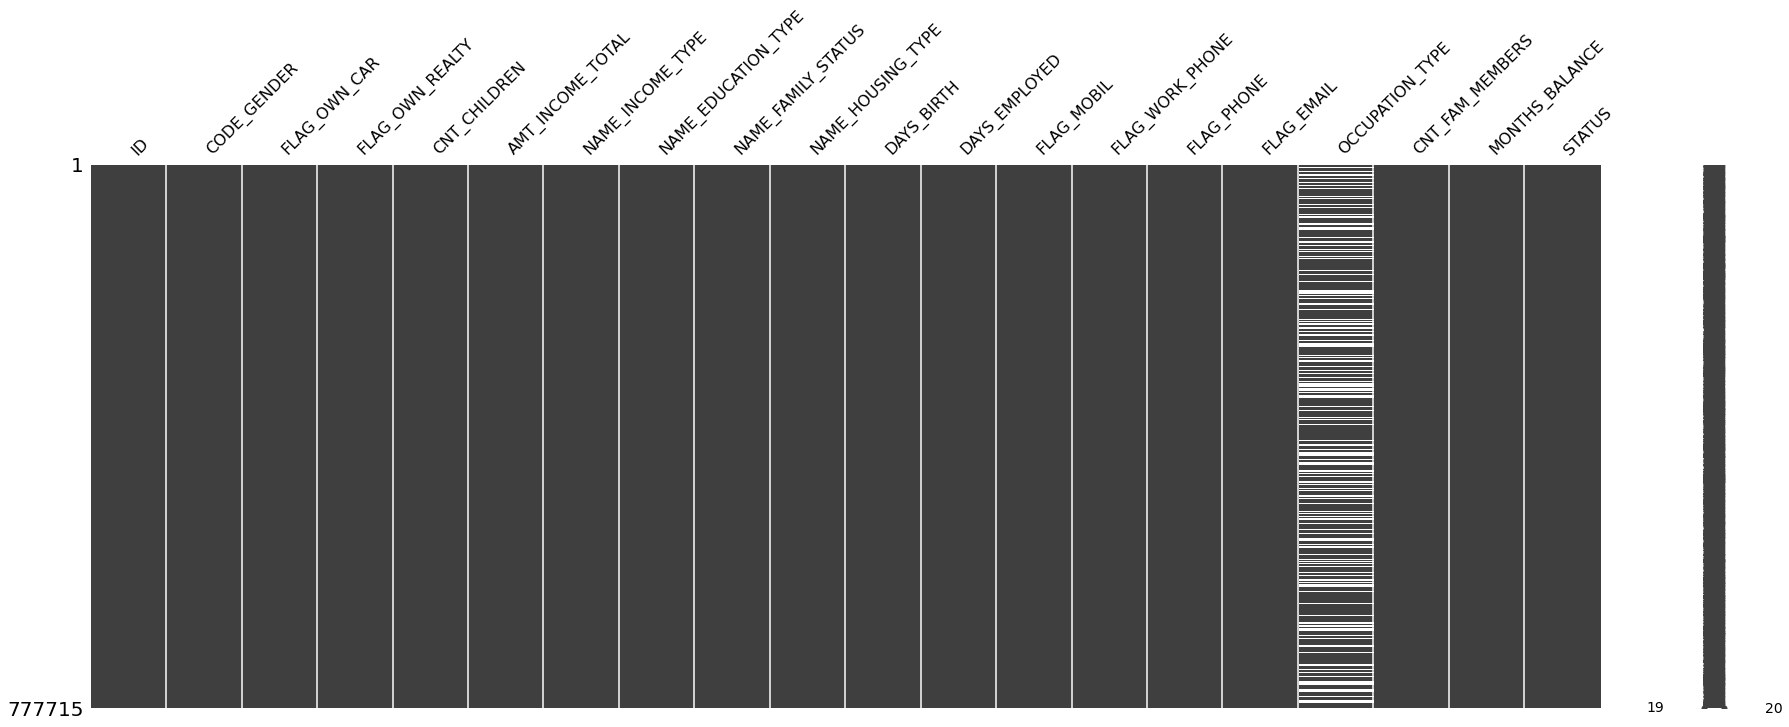

In [ ]:
# Plot graphic of missing values
import missingno
missingno.matrix(df, figsize = (30,10))

In [ ]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:
df.shape

(537667, 20)

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,C


### Feature Engineering 

In [ ]:
df['YEARS_BIRTH'] = abs(round(df['DAYS_BIRTH'] / 365))
df['YEARS_EMPLOYED'] = abs(round(df['DAYS_EMPLOYED'] / 365))

# menampilkan beberapa baris data baru
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,YEARS_BIRTH,YEARS_EMPLOYED
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,0,C,59.0,3.0
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-1,C,59.0,3.0
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-2,C,59.0,3.0
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-3,C,59.0,3.0
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-4,C,59.0,3.0


In [ ]:
df = df.drop(columns = ["DAYS_BIRTH","DAYS_EMPLOYED"])
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS', 'YEARS_BIRTH',
       'YEARS_EMPLOYED'],
      dtype='object')

### Numeric & Categorical Feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  FLAG_MOBIL           537667 non-null  int64  
 11  FLAG_WORK_PHONE      537667 non-null  int64  
 12  FLAG_PHONE           537667 non-null  int64  
 13  FLAG_EMAIL           537667 non-null  int64  
 14  OCCUPATION_TYPE      537667 non-null  object 
 15  CNT_FAM_MEMBERS 

In [ ]:
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])
df_categorical = df.select_dtypes(exclude=[np.number])

In [ ]:
df_numeric.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'YEARS_BIRTH', 'YEARS_EMPLOYED'],
      dtype='object')

In [ ]:
df_categorical.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

###Univariate Analysis

####Numeric Feature

In [ ]:
df_numeric.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'YEARS_BIRTH', 'YEARS_EMPLOYED'],
      dtype='object')

In [ ]:
df_numeric.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,YEARS_BIRTH,YEARS_EMPLOYED
count,5.376670e+05,537667.000000,5.376670e+05,537667.0,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000
mean,5.079231e+06,0.506697,1.971171e+05,1.0,0.281615,0.298893,0.100730,2.303069,-19.305241,41.132277,7.582623
std,4.200200e+04,0.787285,1.041390e+05,0.0,0.449787,0.457773,0.300971,0.936852,14.037827,9.363987,6.566608
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,21.000000,0.000000
25%,5.044925e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000,34.000000,3.000000
50%,5.079091e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000,41.000000,6.000000
75%,5.115755e+06,1.000000,2.295000e+05,1.0,1.000000,1.000000,0.000000,3.000000,-8.000000,48.000000,10.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,67.000000,43.000000


In [ ]:
#ID
df_id = df['ID'].value_counts().reset_index()
df_id.columns = ['ID', 'Tenor_Month']
df_id.head()

,ID,Tenor_Month
0,5069051,61
1,5024819,61
2,5089120,61
3,5116236,61
4,5068331,61


In [ ]:
df_id['Tenor_Year'] = round(df_id['Tenor_Month'] / 12)
df_id.head()

,ID,Tenor_Month,Tenor_Year
0,5069051,61,5.0
1,5024819,61,5.0
2,5089120,61,5.0
3,5116236,61,5.0
4,5068331,61,5.0


In [ ]:
check_id_5090630 = df_numeric[df_numeric['ID'] == 5069051]
check_id_5090630.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,YEARS_BIRTH,YEARS_EMPLOYED
392289,5069051,0,225000.0,1,0,0,0,2.0,0,49.0,7.0
392290,5069051,0,225000.0,1,0,0,0,2.0,-1,49.0,7.0
392291,5069051,0,225000.0,1,0,0,0,2.0,-2,49.0,7.0
392292,5069051,0,225000.0,1,0,0,0,2.0,-3,49.0,7.0
392293,5069051,0,225000.0,1,0,0,0,2.0,-4,49.0,7.0


In [ ]:
check_id_5090630['MONTHS_BALANCE'].value_counts()

 0     1
-31    1
-33    1
-34    1
-35    1
      ..
-25    1
-26    1
-27    1
-28    1
-60    1
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [ ]:
df_numeric = pd.merge(df_numeric, df_id, on='ID')
df_numeric.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,YEARS_BIRTH,YEARS_EMPLOYED,Tenor_Month,Tenor_Year
0,5008806,0,112500.0,1,0,0,0,2.0,0,59.0,3.0,30,2.0
1,5008806,0,112500.0,1,0,0,0,2.0,-1,59.0,3.0,30,2.0
2,5008806,0,112500.0,1,0,0,0,2.0,-2,59.0,3.0,30,2.0
3,5008806,0,112500.0,1,0,0,0,2.0,-3,59.0,3.0,30,2.0
4,5008806,0,112500.0,1,0,0,0,2.0,-4,59.0,3.0,30,2.0


In [ ]:
df_numeric.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'Tenor_Month',
       'Tenor_Year'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

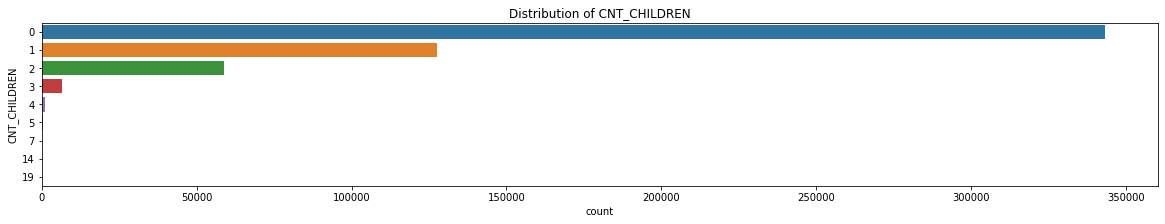

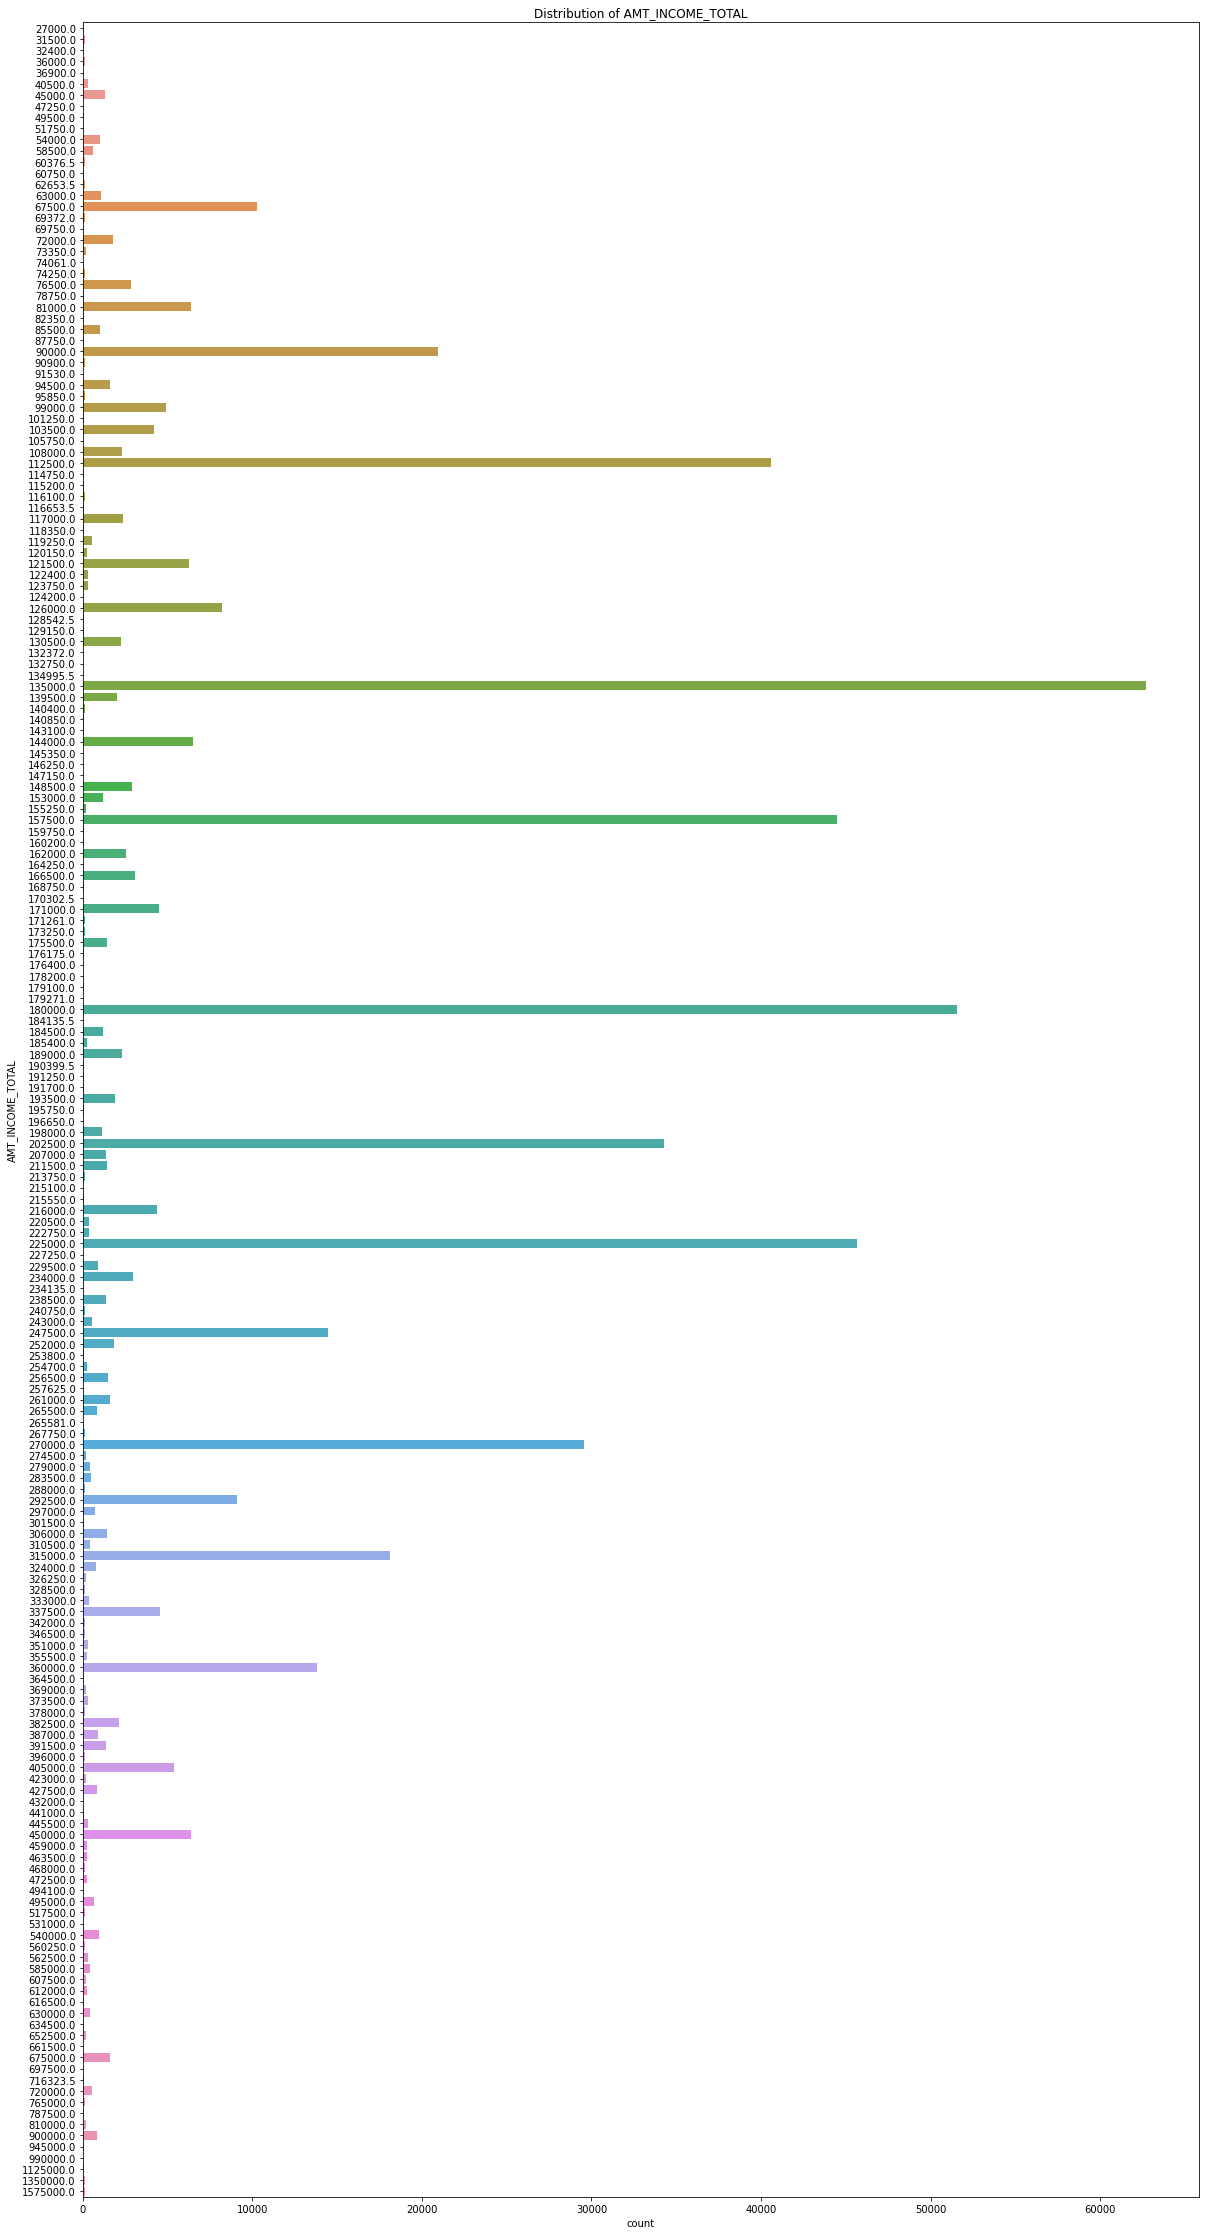

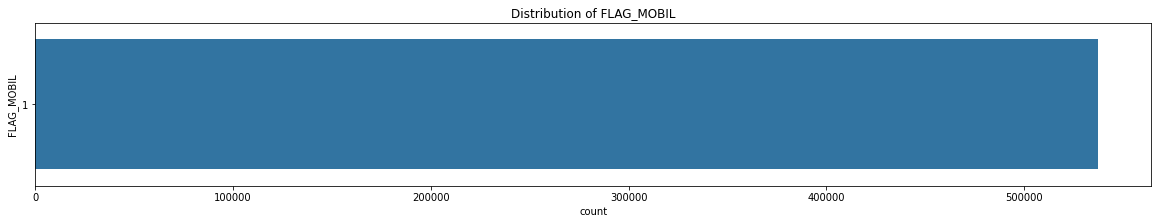

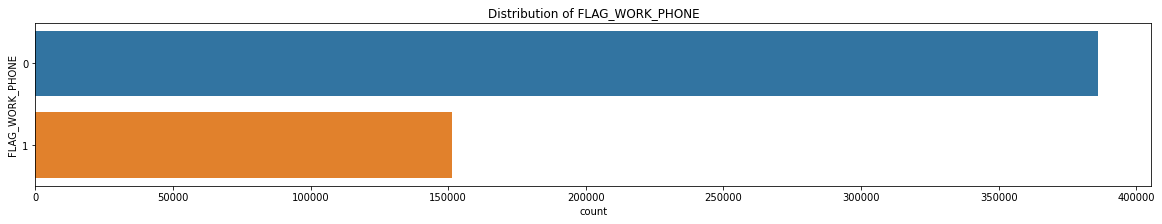

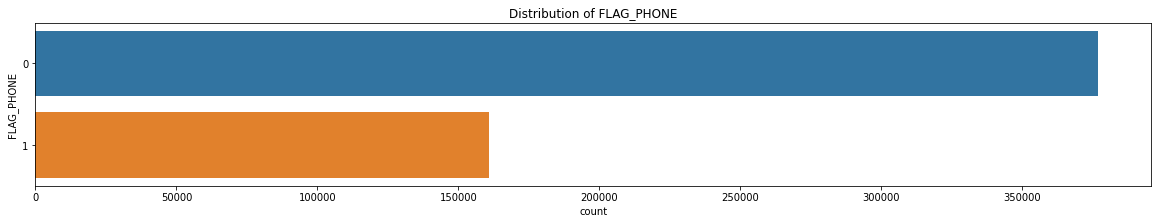

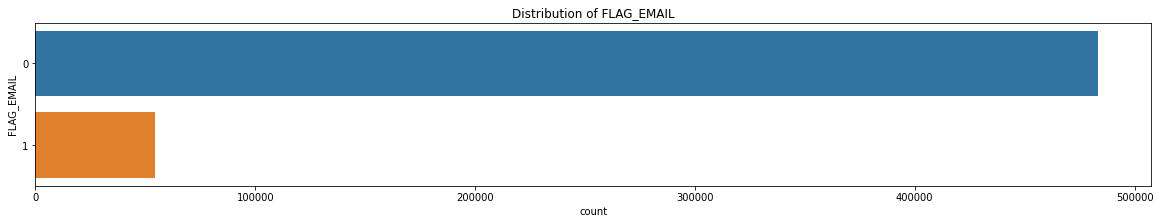

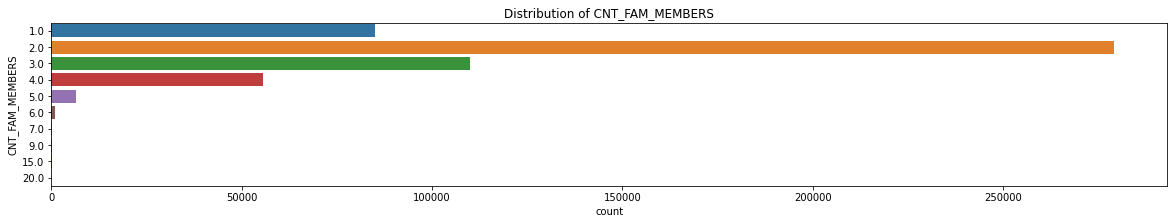

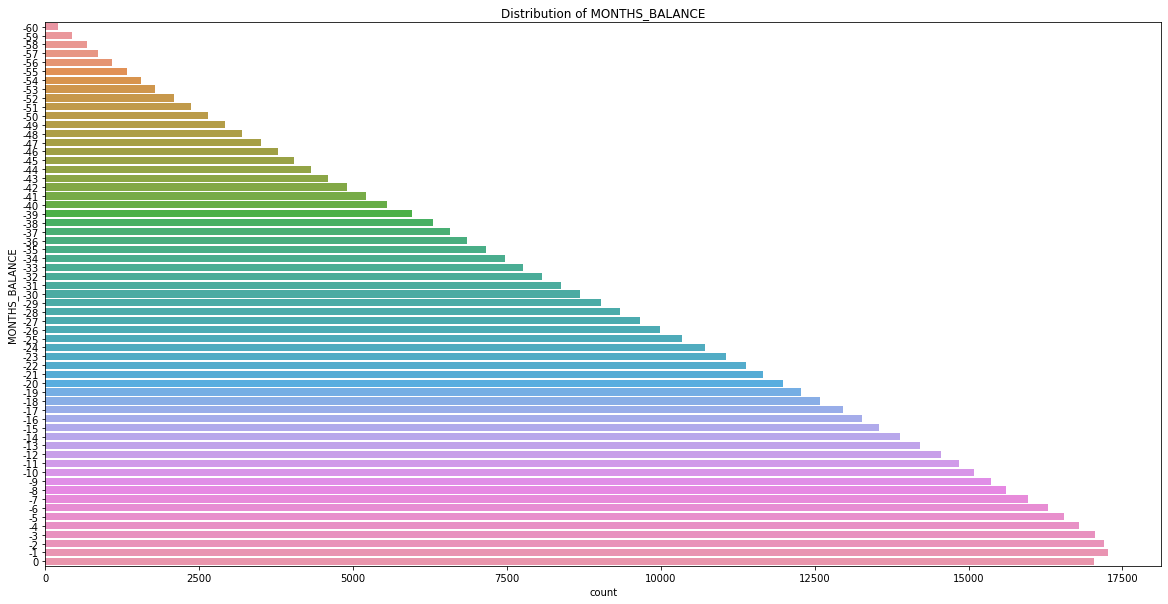

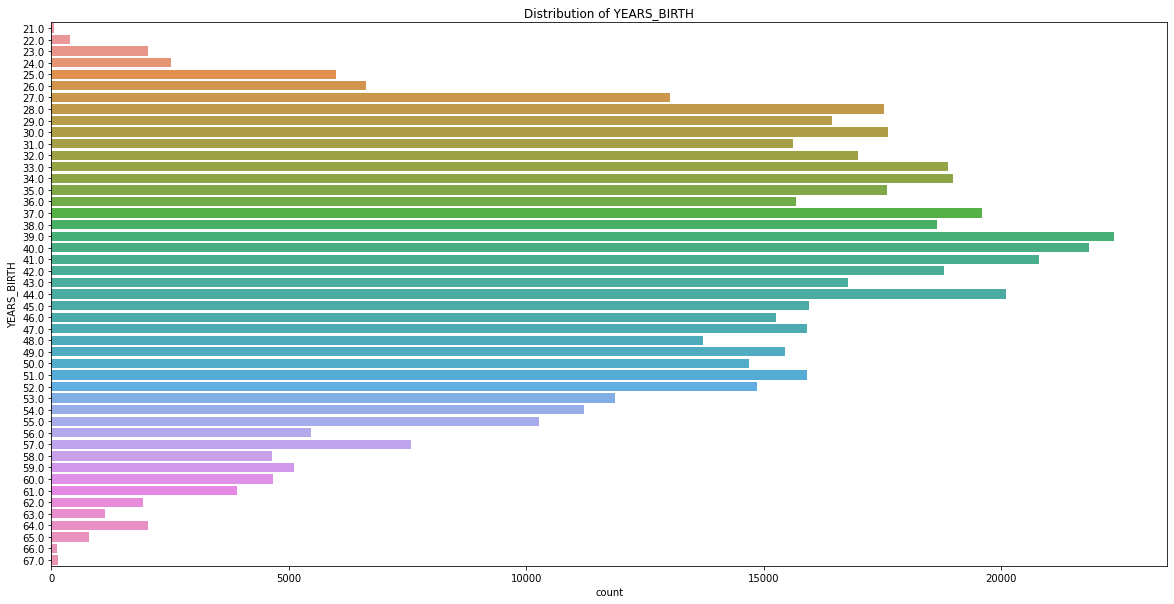

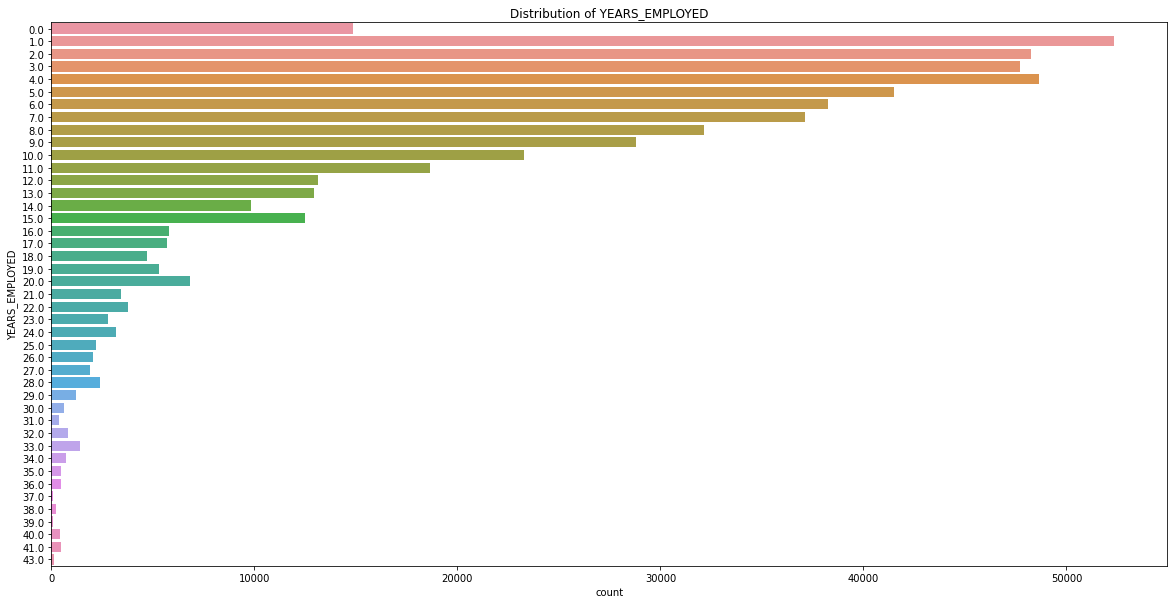

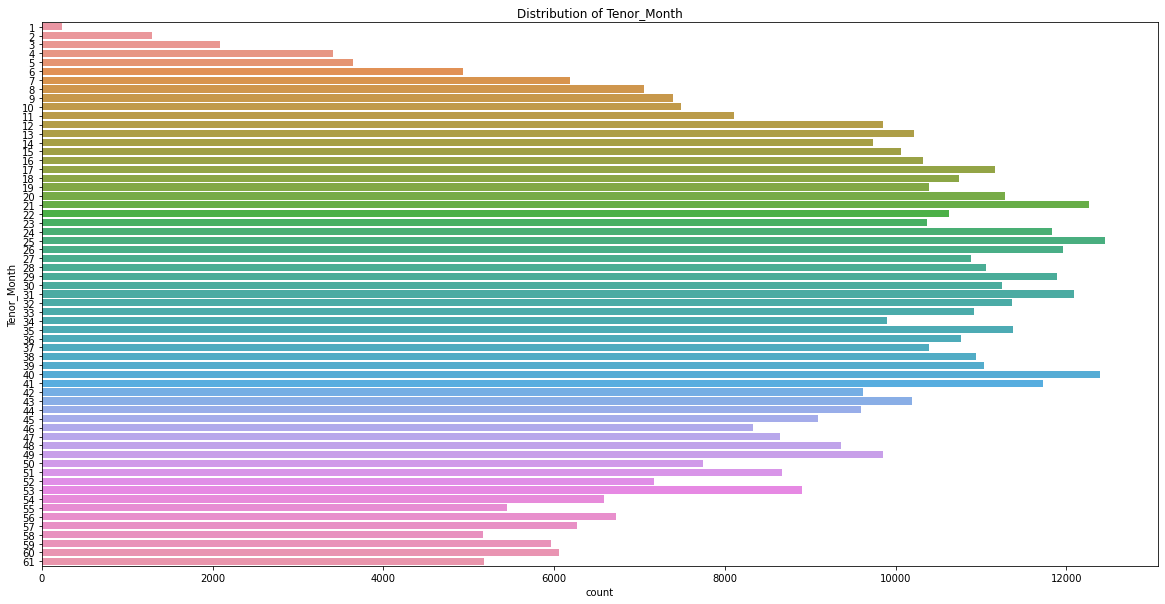

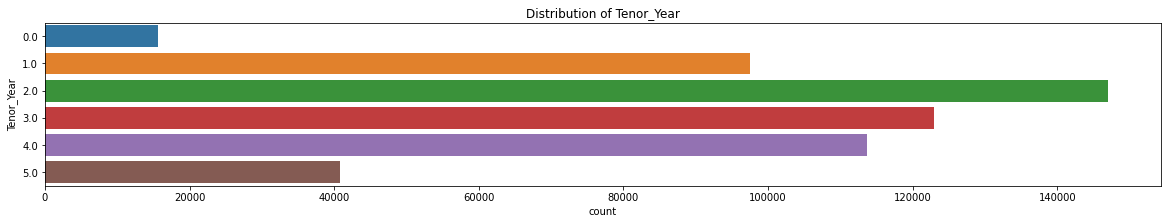

In [ ]:
for col in df_numeric:
  small_plot = ['CNT_CHILDREN','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','Tenor_Year']

  if col in small_plot:
    fig = plt.figure(figsize=(20,3))
  elif col == 'AMT_INCOME_TOTAL': 
    fig = plt.figure(figsize=(20,40))  
  else:
    fig = plt.figure(figsize=(20,10))  

  if col != 'ID':
    sns.countplot(y=f'{col}', data=df_numeric).set(title=f'Distribution of {col}');

####Categorical Feature

In [ ]:
df_categorical.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

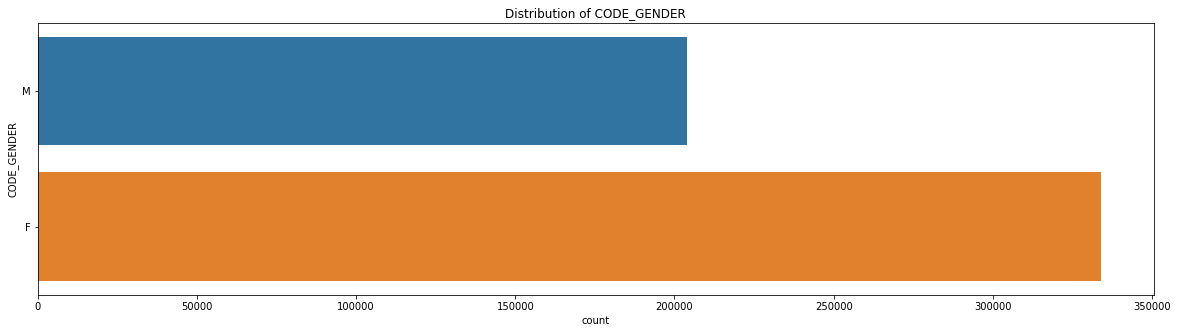

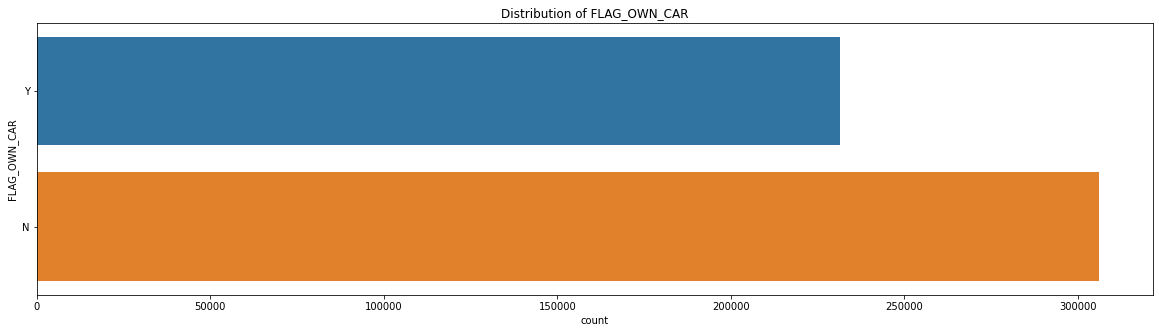

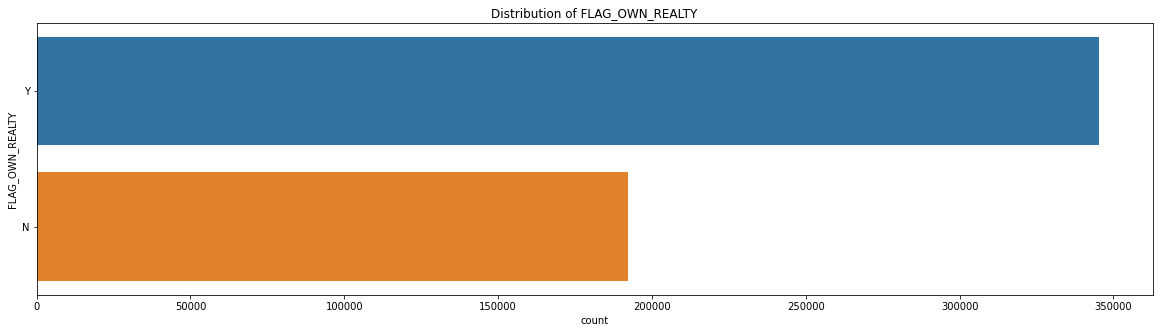

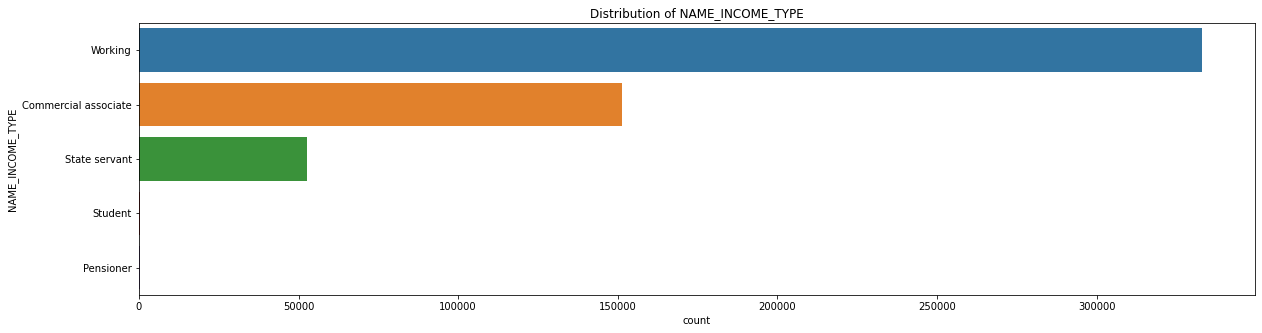

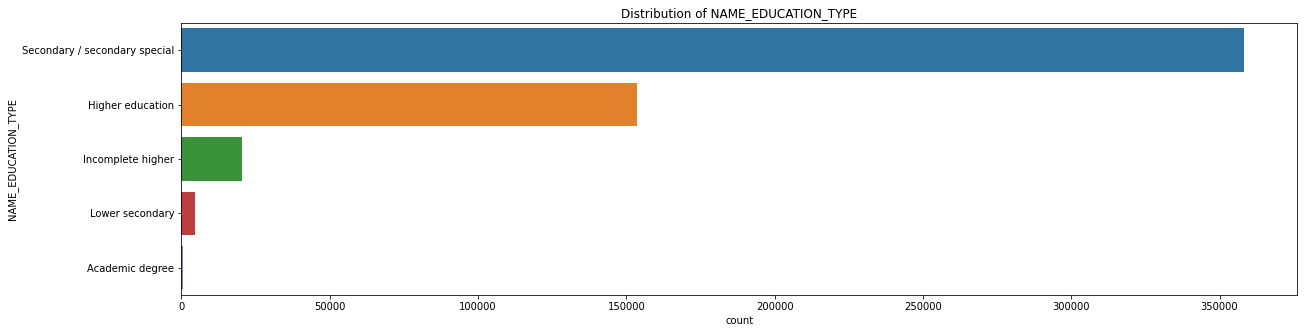

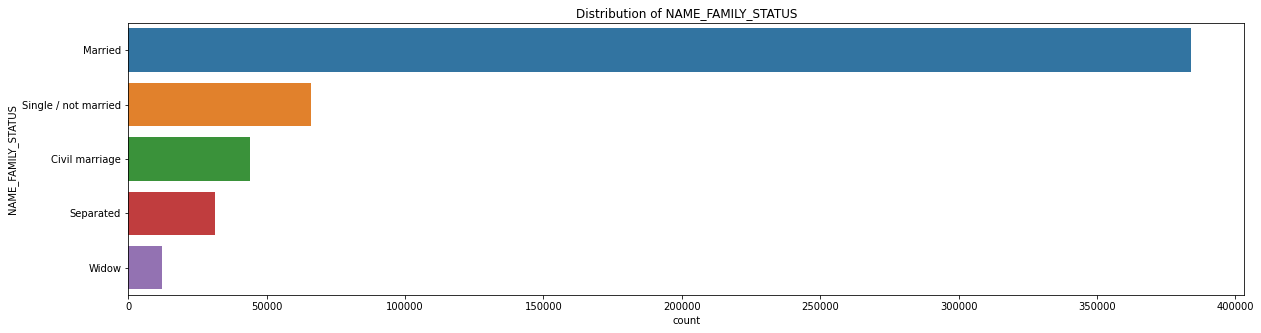

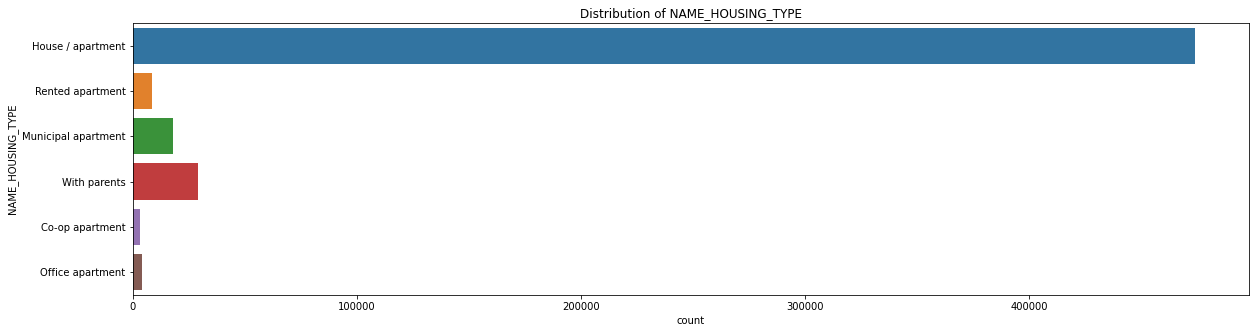

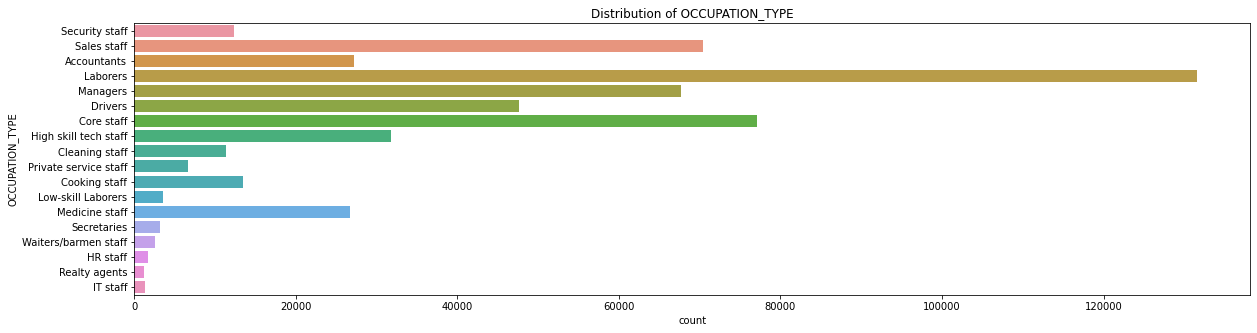

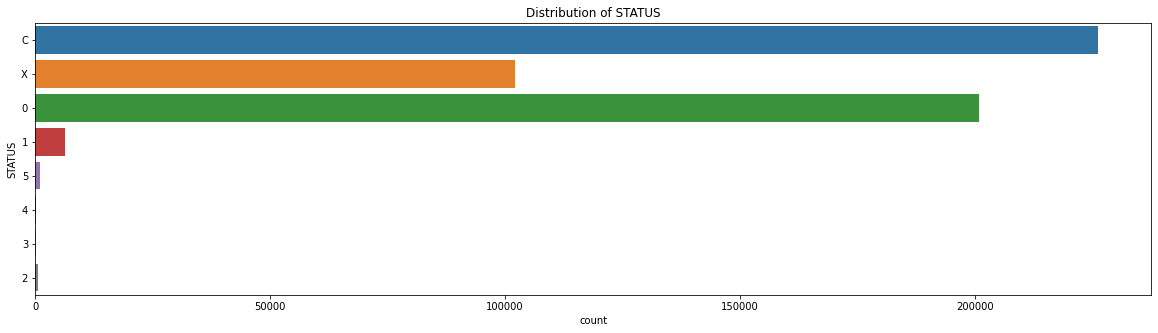

In [ ]:
for col in df_categorical:
  fig = plt.figure(figsize=(20,5))
  sns.countplot(y=f'{col}', data=df_categorical).set(title=f'Distribution of {col}');

###Bivariate Analysis

In [ ]:
df = pd.merge(df, df_id, on='ID')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,YEARS_BIRTH,YEARS_EMPLOYED,Tenor_Month,Tenor_Year
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,0,C,59.0,3.0,30,2.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,-1,C,59.0,3.0,30,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,-2,C,59.0,3.0,30,2.0
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,-3,C,59.0,3.0,30,2.0
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2.0,-4,C,59.0,3.0,30,2.0


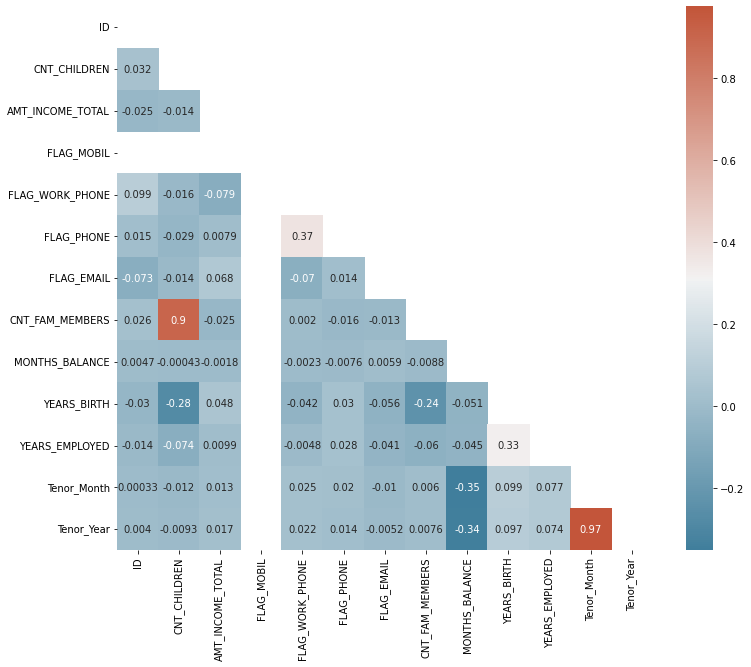

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
for col in df:
  if col != 'ID':
    CrosstabResult=pd.crosstab(index=df[f'{col}'],columns=df['STATUS']) 
    ChiSqResult = chi2_contingency(CrosstabResult)
    print(f'The P-Value of the ChiSq Test of {col} is:', ChiSqResult[1])

The P-Value of the ChiSq Test of CODE_GENDER is: 7.802068502423555e-76
The P-Value of the ChiSq Test of FLAG_OWN_CAR is: 9.774624270025516e-33
The P-Value of the ChiSq Test of FLAG_OWN_REALTY is: 8.440010778395308e-44
The P-Value of the ChiSq Test of CNT_CHILDREN is: 5.595446647132482e-133
The P-Value of the ChiSq Test of AMT_INCOME_TOTAL is: 0.0
The P-Value of the ChiSq Test of NAME_INCOME_TYPE is: 0.0
The P-Value of the ChiSq Test of NAME_EDUCATION_TYPE is: 4.610004697244208e-151
The P-Value of the ChiSq Test of NAME_FAMILY_STATUS is: 1.2169436746747933e-108
The P-Value of the ChiSq Test of NAME_HOUSING_TYPE is: 8.064238892241276e-97
The P-Value of the ChiSq Test of FLAG_MOBIL is: 1.0
The P-Value of the ChiSq Test of FLAG_WORK_PHONE is: 2.448421411605771e-38
The P-Value of the ChiSq Test of FLAG_PHONE is: 2.3119449984594892e-59
The P-Value of the ChiSq Test of FLAG_EMAIL is: 1.3565207499293968e-26
The P-Value of the ChiSq Test of OCCUPATION_TYPE is: 0.0
The P-Value of the ChiSq Test 

###Good Debt vs Bad Debt

In [ ]:
df.shape

(537667, 22)

In [ ]:
df_no_loan = df[df['STATUS']== 'X']
df_no_loan.shape

(102167, 22)

In [ ]:
df_good_loan = df[df['STATUS']== 'C']
df_good_loan.shape

(226185, 22)

In [ ]:
df_bad_loan = df.query('STATUS !="C" & STATUS !="X"')
df_bad_loan.shape

(209315, 22)

In [ ]:
high_corr_col = ['AMT_INCOME_TOTAL','OCCUPATION_TYPE','MONTHS_BALANCE','YEARS_BIRTH','YEARS_EMPLOYED','Tenor_Month','Tenor_Year']

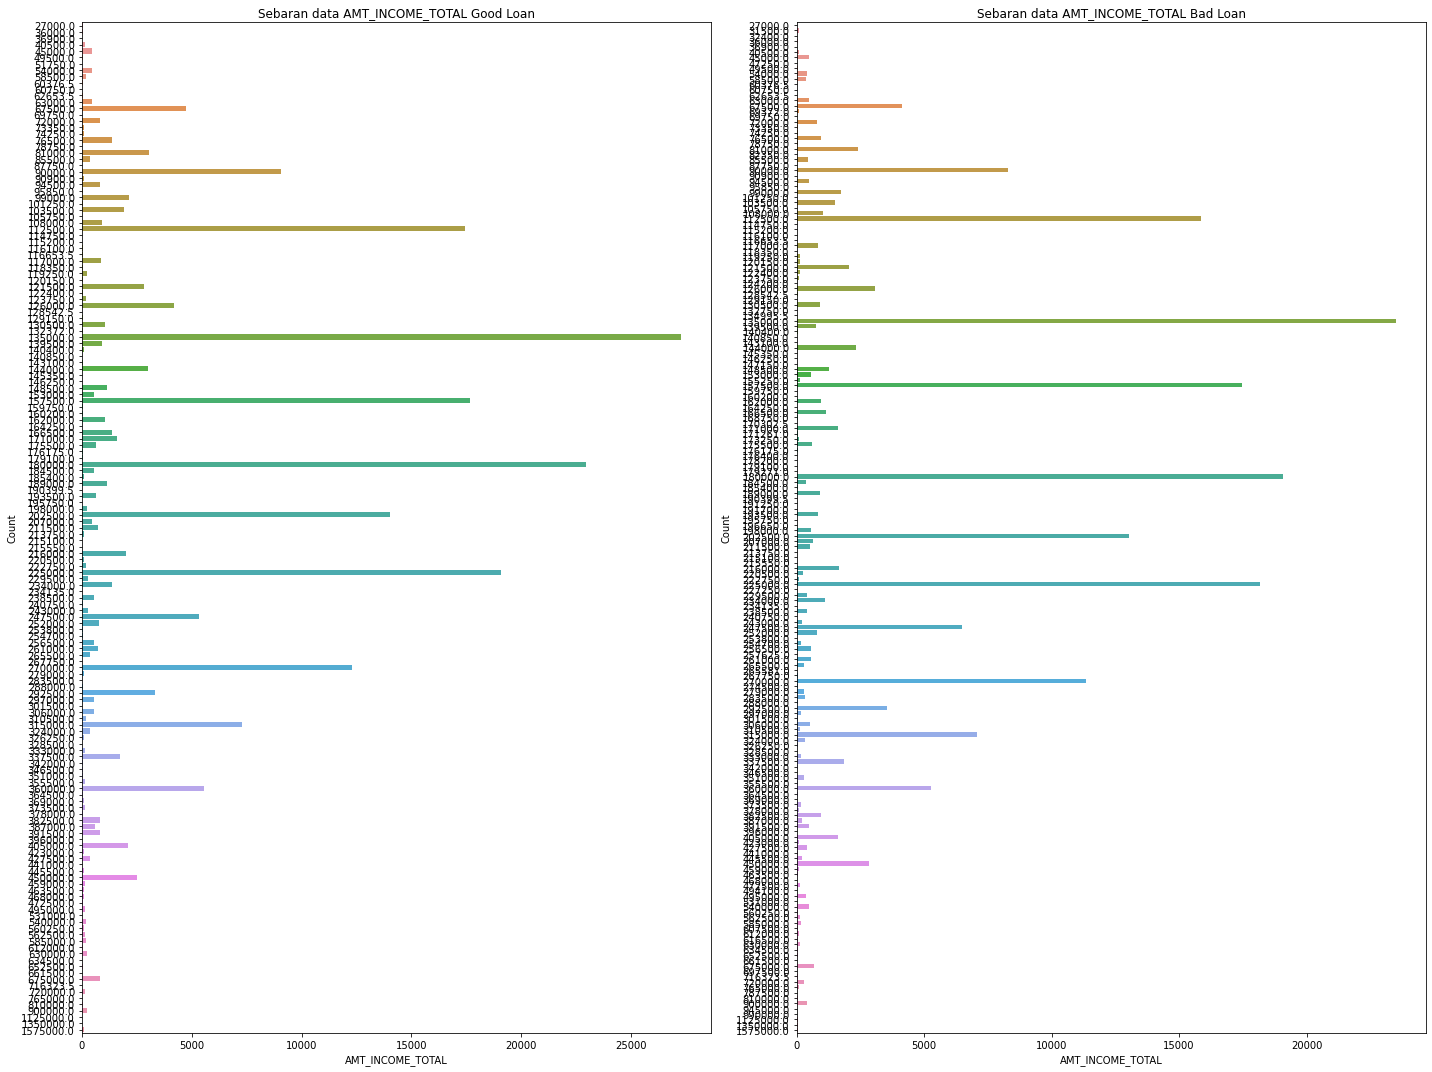

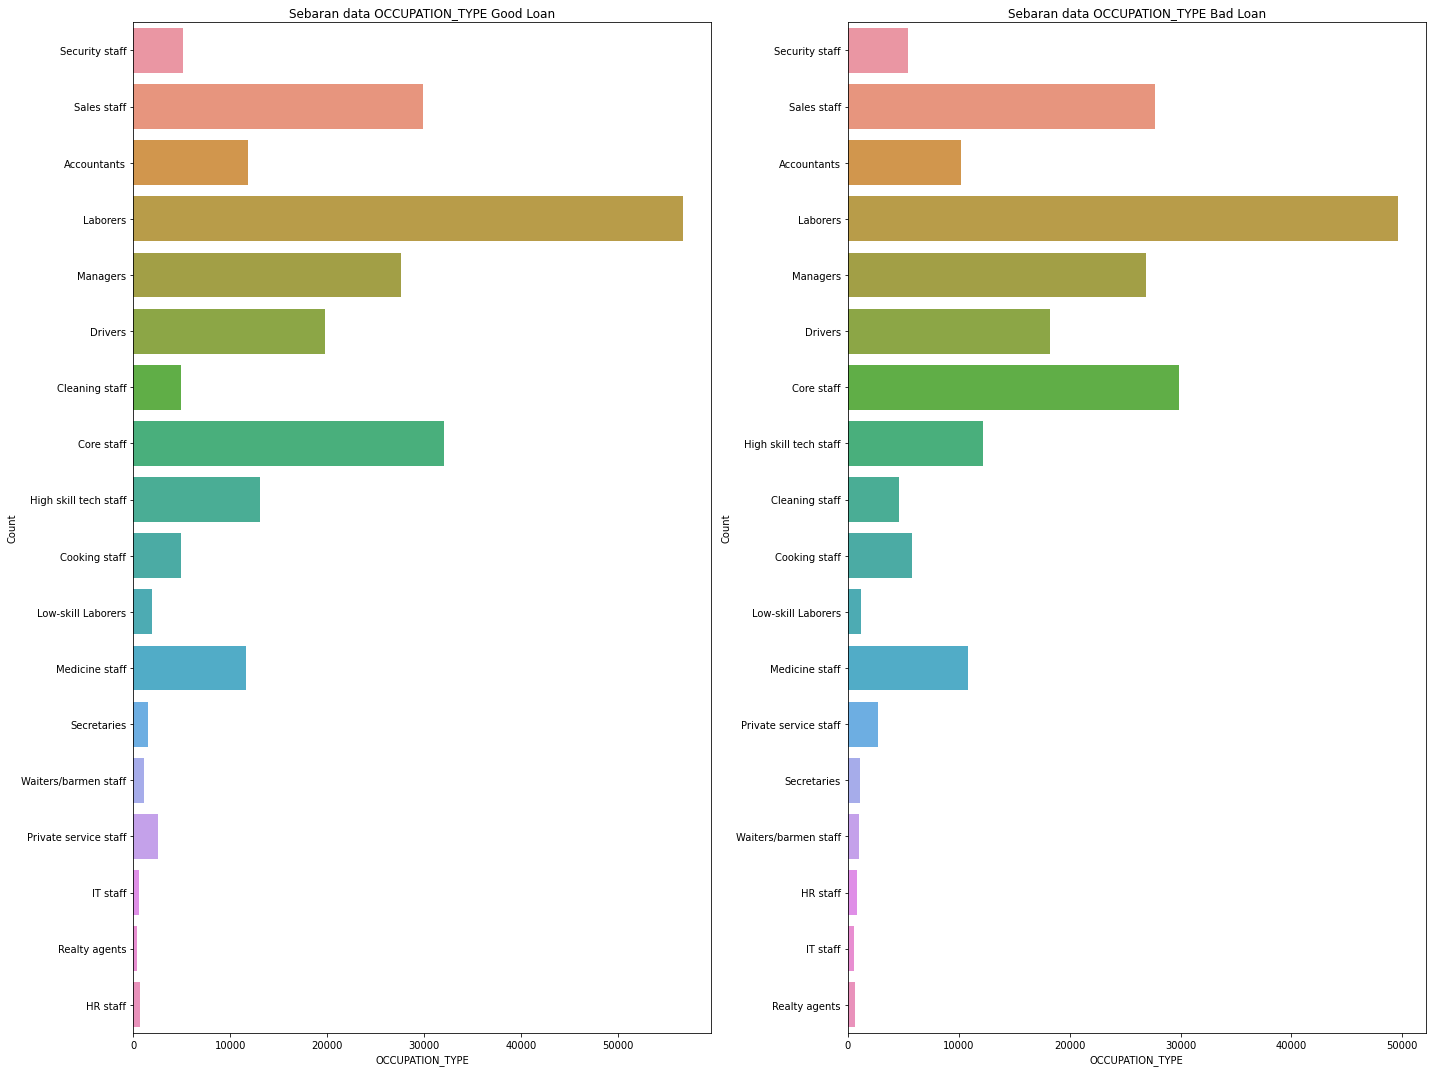

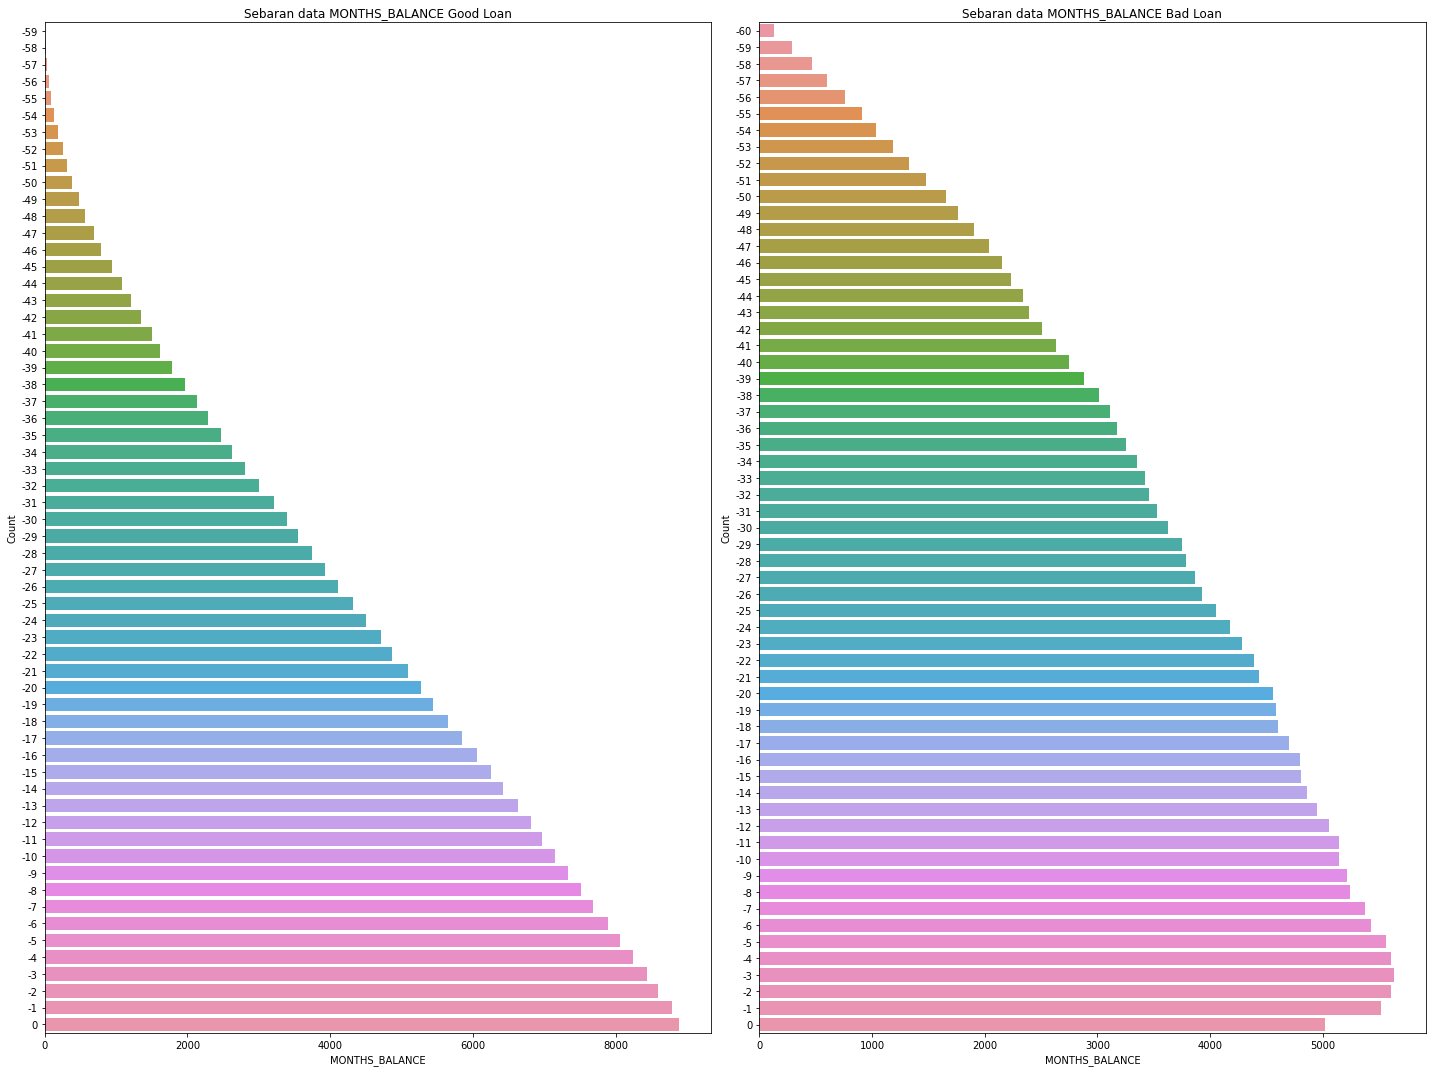

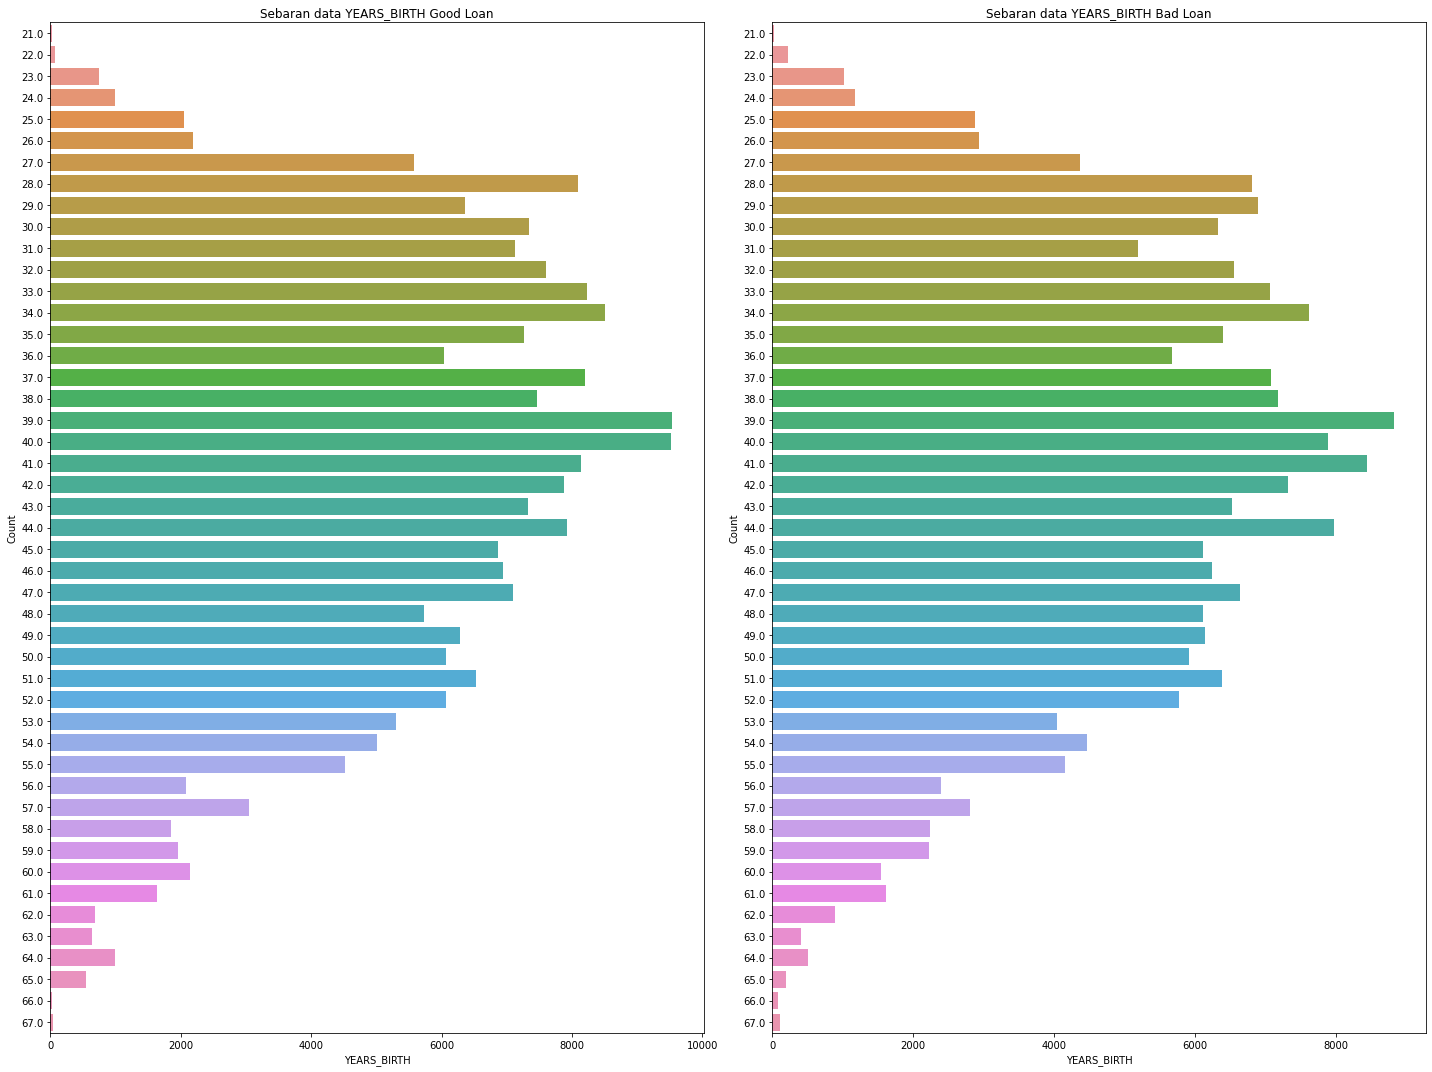

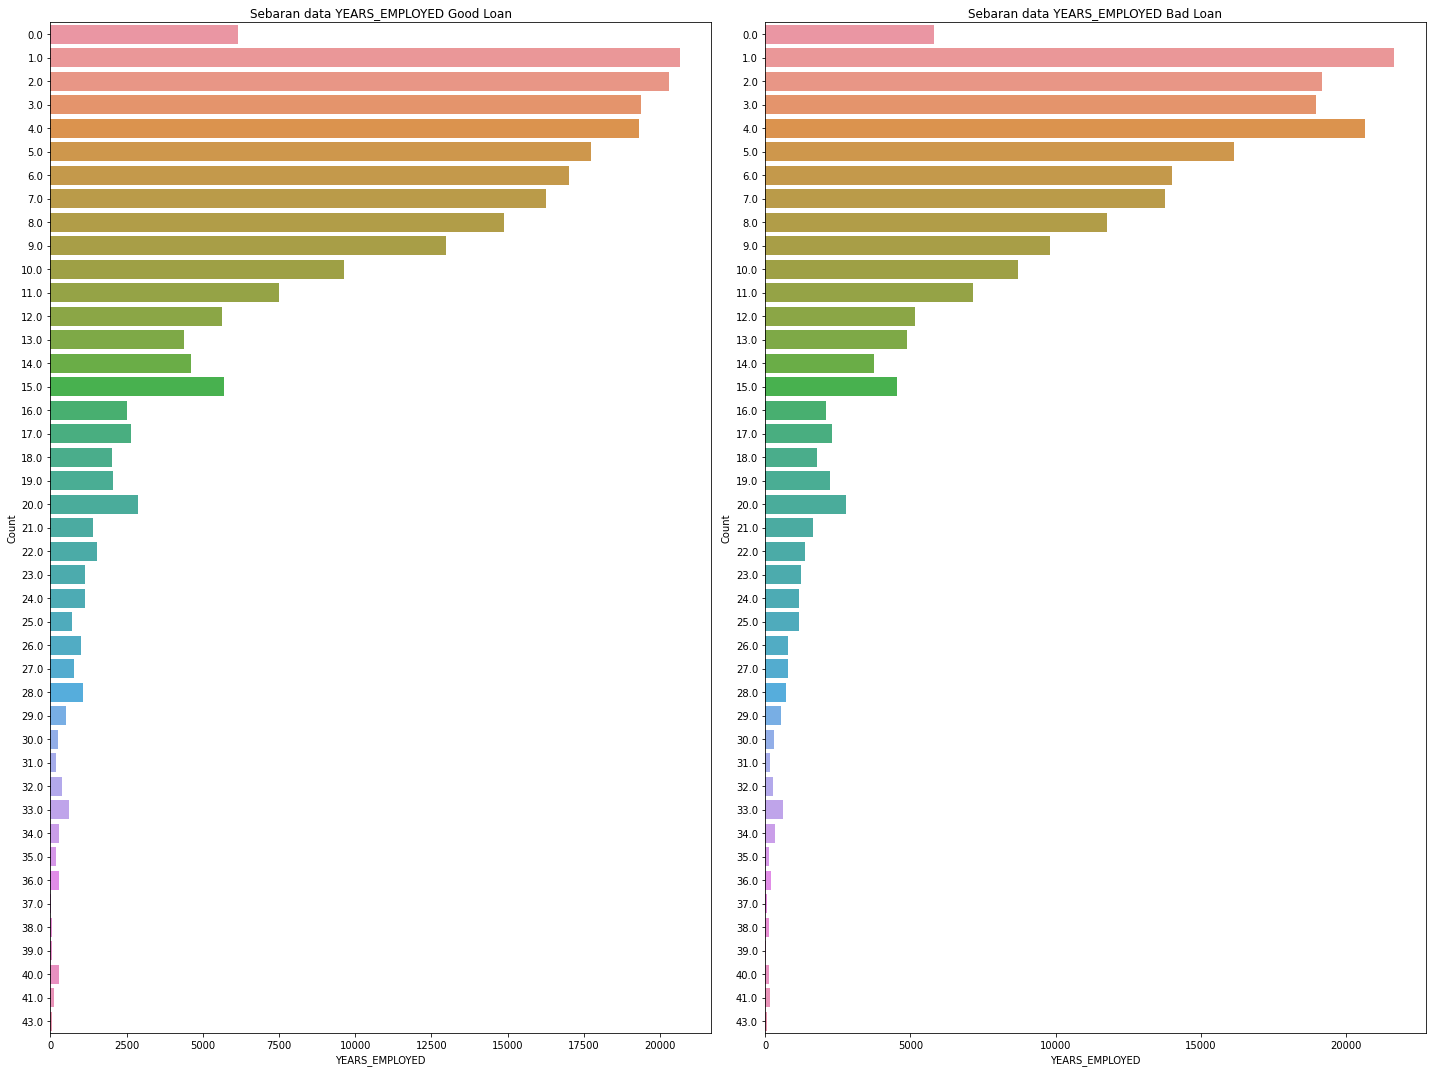

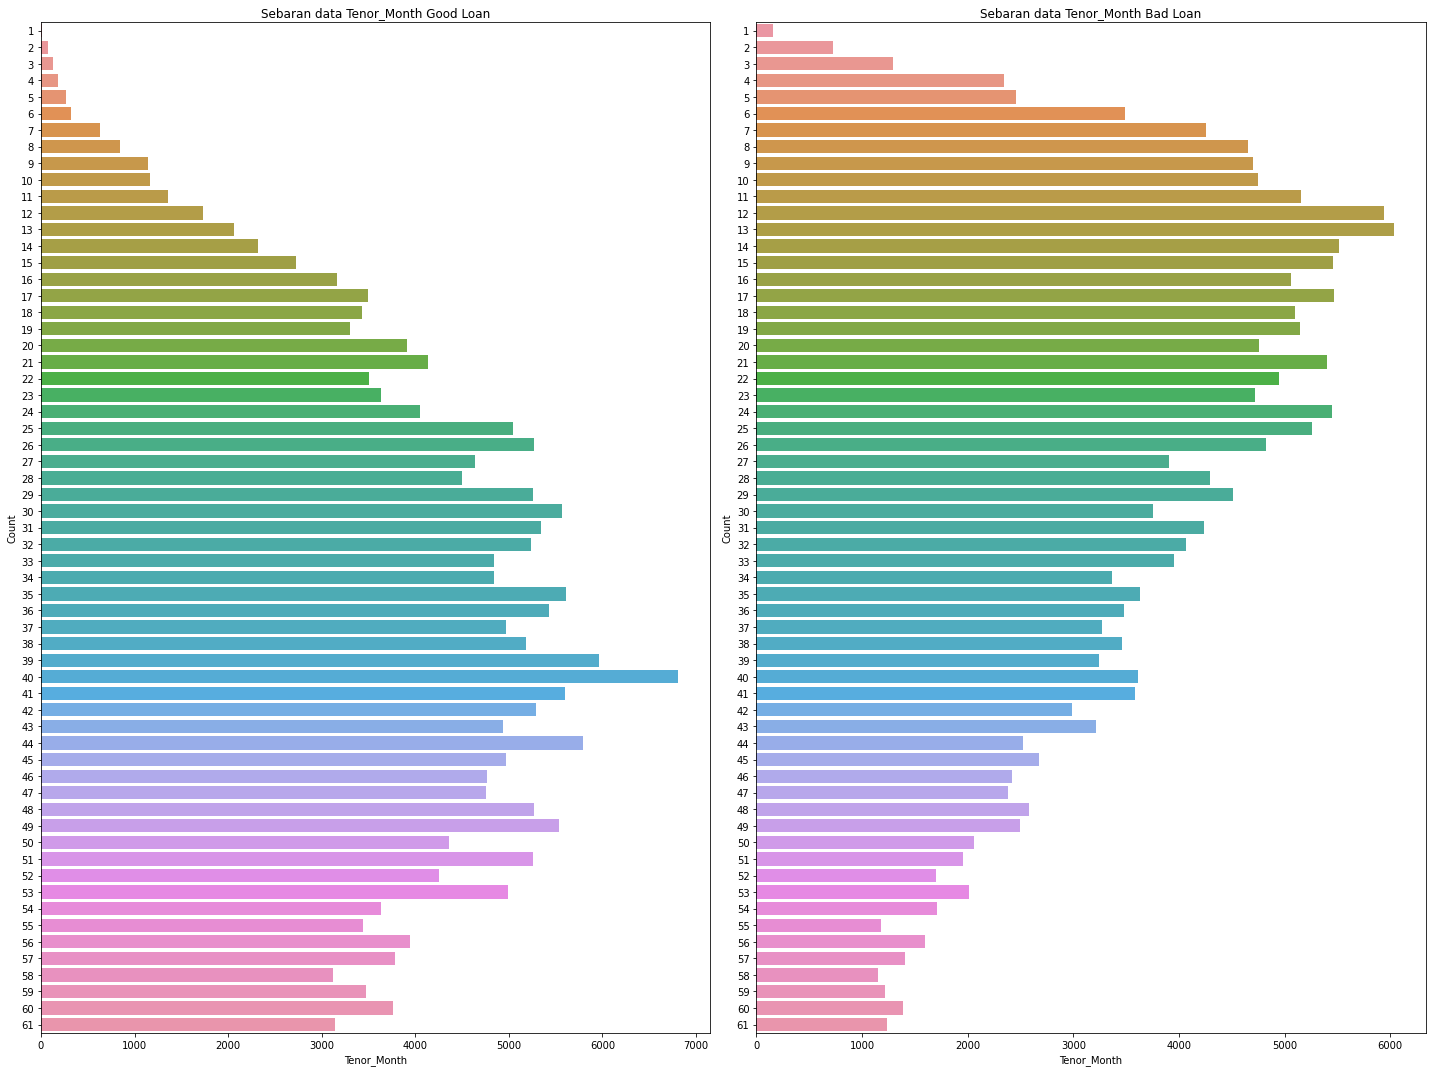

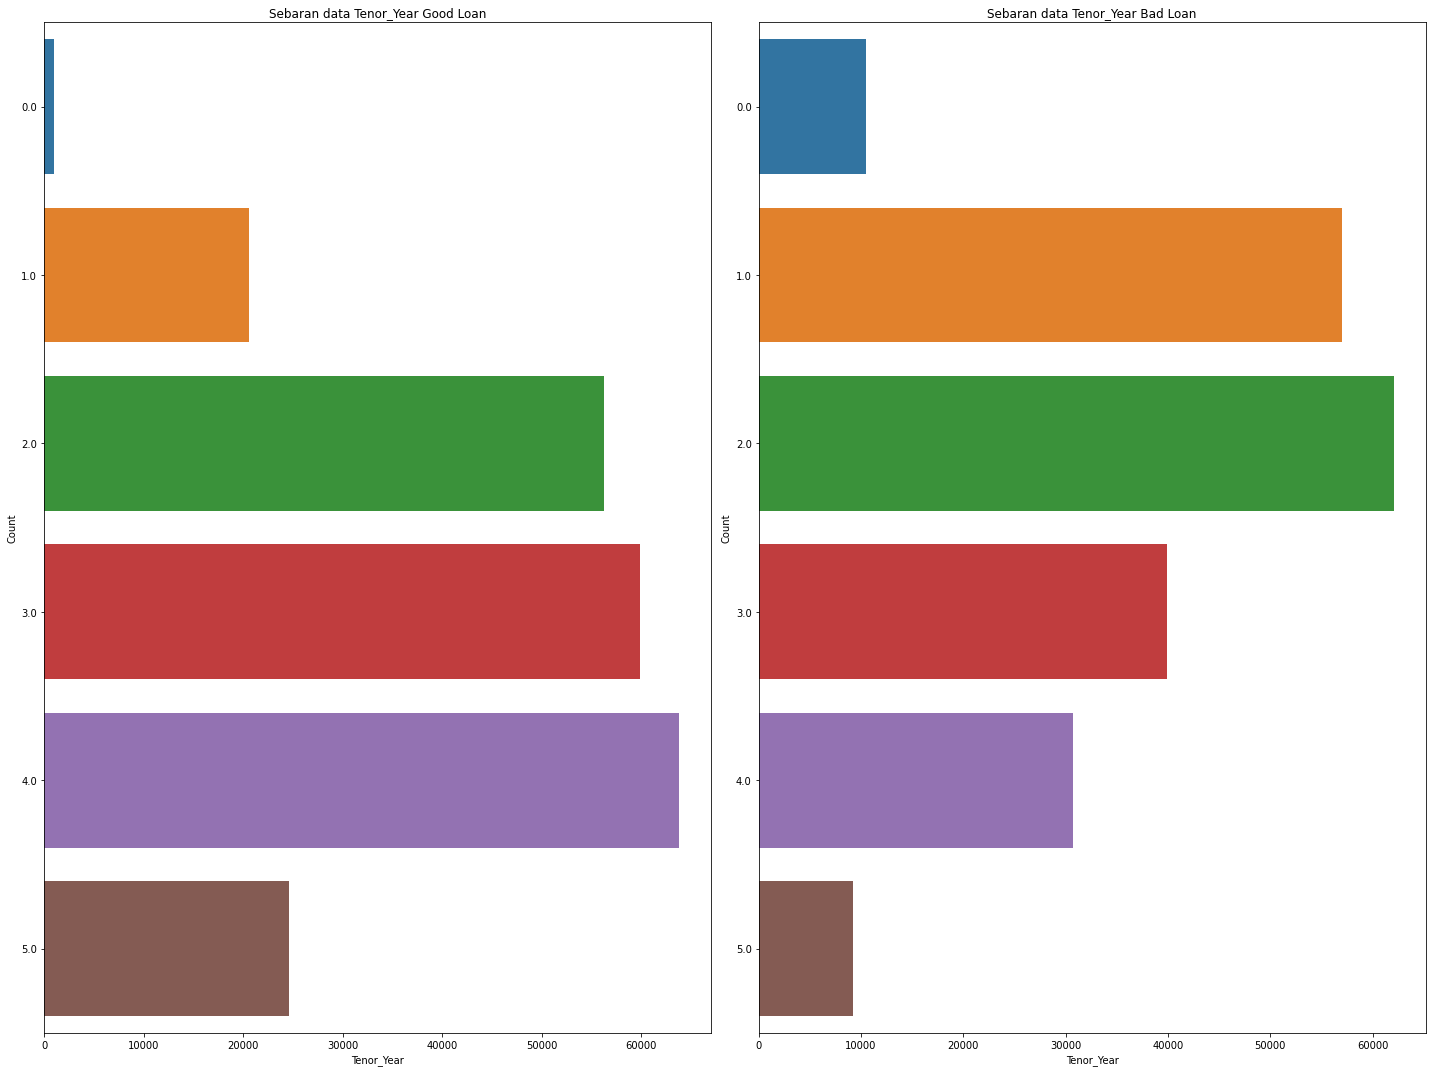

In [ ]:
for col in high_corr_col:
  # sample dataframes
  df1 = df_good_loan.copy()
  df2 = df_bad_loan.copy()

  f, ax = plt.subplots(figsize=(20, 15))

  # create the first plot
  plt.subplot(1, 2, 1)
  sns.countplot(y=f"{col}", data=df1)
  plt.title(f"Sebaran data {col} Good Loan")
  plt.xlabel(f"{col}")
  plt.ylabel("Count")

  # create the second plot
  plt.subplot(1, 2, 2)
  sns.countplot(y=f"{col}", data=df2)
  plt.title(f"Sebaran data {col} Bad Loan")
  plt.xlabel(f"{col}")
  plt.ylabel("Count")

  # show the plot
  plt.tight_layout()
  plt.show()


###Challenge 

**Buatlah Report Analisa Data dengan struktur :**

1. Judul
2. Nama
3. Pendahuluan
  - Latar Belakang
  - Rumusan Masalah 
  - Tujuan
4. Metode Penelitian
  - Sumber Data
  - Metode Analisis
5. Hasil dan Kesimpulan
  1. Univariate Analysis
  2. Bivariate Analysis